In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, ifftshift, fftshift

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_81165/1527526864.py:46: RuntimeWarning: invalid value encountered in divide
  Fa_p = 2 * np.sin(a * xi) / xi
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_81165/1527526864.py:52: RuntimeWarning: invalid value encountered in divide
  Fa_f = 2 * np.sin(2 * a * np.pi * nu) / (2 * np.pi * nu)


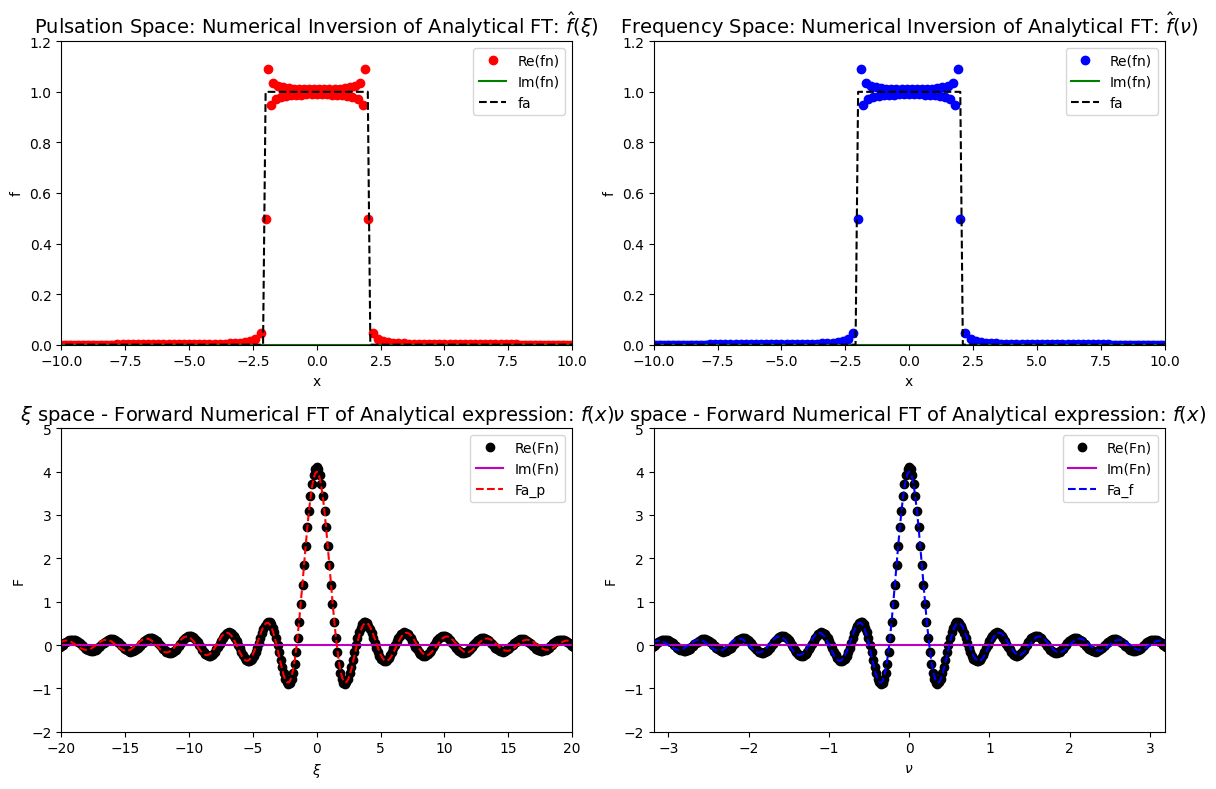

In [5]:
# Numerical checks of the Fourier Transforms

# ===========================================
#  Rectangular Unit Pulse <--> Sinc function
# ===========================================

#  To help us understand how the FFT algorithm works, we can perform the
#  fourier transform on functions that we already have an analytical
#  solution to and then compare.

## STEP 1: Grids
#  Since we are working with a numerical algorithm we need an appropriate
#  grid over which to work. As a rule its always best to define the number
#  of grid points to be a power of 2. 

# STEP 1: Grids
# GRID IN REAL SPACE
N = 512 # Number of grid points 
dx = 0.1 # Grid step size in real space
upperx = N*dx # Upper truncation limit in real space
x = dx*np.arange(-N/2, N/2) # Grid in real space

# GRID IN FOURIER SPACE (Pulsation)
dxi = (2*np.pi)/(N*dx) # Grid step size in fourier space
upperxi = N*dxi # Upper truncation limit in fourier space
xi = dxi*np.arange(-N/2, N/2) # Grid in fourier space

# GRID IN FOURIER SPACE (Frequency)
dnu = 1/(N*dx) # Grid step size in fourier space
uppernu = N*dnu # Upper truncation limit in fourier space
nu = dnu*np.arange(-N/2, N/2)  # Grid in fourier space

# STEP 2: Functions
# f(x) = indicator[-a,a]

# Sinc function:
# f[xi] = 2*sin(a*xi)/xi             --- Pulsation
# f(nu) = 2*sin(2*a*pi*nu)/(2*pi*nu) --- Frequency

# ANALYTICAL expressions
# -----------------------------
fa = np.ones(N)
a = 2
fa[(x < -a) | (x > a)] = 0

Fa_p = 2 * np.sin(a * xi) / xi
Fa_p[N//2] = 2 * a
# --Alternative formulation--
#Fa_p = (np.exp(1i*a*xi) - exp(-1i*a*xi))/xi
#Fa_p[N/2+1] = 2*a

Fa_f = 2 * np.sin(2 * a * np.pi * nu) / (2 * np.pi * nu)
Fa_f[N//2] = 2 * a

# NUMERICAL approximations
Fn = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fa))) * upperx
fn_p = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa_p))) / upperx
fn_f = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa_f))) / upperx

# STEP 3: Graphical check

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, np.real(fn_p), 'ro')
plt.plot(x, np.imag(fn_p), 'g')
plt.plot(x, fa, '--k')
plt.axis([-10, 10, 0, 1.2])
plt.title('Pulsation Space: Numerical Inversion of Analytical FT: $\\hat{f}(\\xi)$', fontsize=14)
plt.xlabel('x')
plt.ylabel('f')
plt.legend(['Re(fn)', 'Im(fn)', 'fa'])

plt.subplot(2, 2, 2)
plt.plot(x, np.real(fn_f), 'bo')
plt.plot(x, np.imag(fn_f), 'g')
plt.plot(x, fa, '--k')
plt.axis([-10, 10, 0, 1.2])
plt.title('Frequency Space: Numerical Inversion of Analytical FT: $\\hat{f}(\\nu)$', fontsize=14)
plt.xlabel('x')
plt.ylabel('f')
plt.legend(['Re(fn)', 'Im(fn)', 'fa'])

plt.subplot(2, 2, 3)
plt.plot(xi, np.real(Fn), 'ko')
plt.plot(xi, np.imag(Fn), 'm')
plt.plot(xi, Fa_p, '--r')
plt.axis([-20, 20, -a, 2.5 * a])
plt.title('$\\xi$ space - Forward Numerical FT of Analytical expression: $f(x)$', fontsize=14)
plt.xlabel('$\\xi$')
plt.ylabel('F')
plt.legend(['Re(Fn)', 'Im(Fn)', 'Fa_p'])

plt.subplot(2, 2, 4)
plt.plot(nu, np.real(Fn), 'ko')
plt.plot(nu, np.imag(Fn), 'm')
plt.plot(nu, Fa_f, '--b')
plt.axis([-10/np.pi, 10/np.pi, -a, 2.5 * a])
plt.title('$\\nu$ space - Forward Numerical FT of Analytical expression: $f(x)$', fontsize=14)
plt.xlabel('$\\nu$')
plt.ylabel('F')
plt.legend(['Re(Fn)', 'Im(Fn)', 'Fa_f'])

plt.tight_layout()